# Plane wall with Dirichlet boundary conditions: quadratic variation of conductivity

# Model fitting to experimental data

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/cghiaus/var_cond/HEAD?labpath=notebooks%2F02_2_dirichlet_2ord.ipynb)

Let's consider heat transfer in steady-state, without internal sources, in a plane wall for which the conductivity varies quadratically with temperature:

$$
\lambda = \lambda_0(1 + \beta (T - T_b)^2)
$$

where $\lambda_0$, $\beta$, and $T_b$ are determined experimenatlly.

We will consider that the wall, of width $w$, has [Dirichlet boundary conditions](https://en.wikipedia.org/wiki/Dirichlet_boundary_condition): $T_0$ in $x = 0$ and $T_1$ in $x = w$.

## Analytical solution

The [heat flux](https://en.wikipedia.org/wiki/Heat_flux) is constant:
$$
\varphi = - \lambda \frac{dT}{dx} = -A
$$

Replacing $\lambda$ by its quadratic expression, we obtain:

$$
\lambda_0 (1 + \beta (T - T_b)^2) \frac{d T}{d x} = A
$$

Changing the variable $\theta ≡ T - T_b$, and 
using the [separation of variables](https://en.wikipedia.org/wiki/Separation_of_variables), we obtain:

$$
\lambda_0 (1 + \beta \theta^2) \ d \theta = A \ dx
$$

which, by integration, yields:

$$
\theta + \beta \frac{\theta^3}{3} = \frac{A}{\lambda_0} x + \frac{B}{\lambda_0}
$$

By substituting $C ≡ A / \lambda_0$ and $D ≡ D / \lambda_0$, we obtain:

$$
\theta + \beta \frac{\theta^3}{3} = C x + D
$$

The constants $C$ and $D$ are obtained from boundary conditions:

- at $x = 0$, $T = T_0$ and $\theta = \theta_0 ≡ T_0 - T_b$; it results

$$
D = \theta_0 + \beta \frac{\theta_0^3}{3}
$$

- at $x = w$, $T = T_1$ and $\theta = \theta_1 ≡ T_1 - T_b$; it results:

$$
C = \frac{\theta_1 - \theta_0}{w} \left ( 1 + \beta \frac{\theta_0^2 + \theta_0 \theta_1 + \theta_1^2}{3} \right )
$$

From equation $\theta + \beta \frac{\theta^3}{3} = C x + D$, it results the temperature distribution by solving for $\theta$ the equation:

$$
\theta^3 + b \theta + c = 0
$$

where:
- $b = \frac{3}{\beta}$
- $c = -\frac{3}{\beta}(C x + D)$

There are two imaginary solutions and one real solution ([polymathsolve.com](https://www.polymathlove.com/polymonials/midpoint-of-a-line/symbolic-equation-solving.html#c=solve_algstepsequationsolve&v239=x%255E3%2520%2B%2520b*x%2520%2B%2520c%2520%253D%25200&v240=x), [quickmath.com](https://quickmath.com/#c=solve&v1=x%255E3%2Bbx%2Bc%253D0&v3=x)).

In [1]:
import sympy as sp
import numpy as np

x, b, c = sp.symbols('x b c')
equation = x**3 + b*x + c
solution = sp.solve(equation, x)

We will keep only the real solution.

In [2]:
# sp.init_printing() 
solution[0]

b/(27*c/2 + sqrt(108*b**3 + 729*c**2)/2)**(1/3) - (27*c/2 + sqrt(108*b**3 + 729*c**2)/2)**(1/3)/3

In [3]:
print(solution[0])

b/(27*c/2 + sqrt(108*b**3 + 729*c**2)/2)**(1/3) - (27*c/2 + sqrt(108*b**3 + 729*c**2)/2)**(1/3)/3


The temperature distribution is:

$$
\theta = \frac{b}{b_c} - \frac{b_c}{3}
$$
where:
$$
b_c = \sqrt[3]{\frac{27c}{2} + \frac{\sqrt{108b^3 + 729c^3}}{2}}
$$

The [heat flux](https://en.wikipedia.org/wiki/Heat_flux) is:

$$
\varphi = -\lambda_0 C 
$$

## Numerical solution

The convergence criteria and the validation are similar to the case of linear model for the conductivity.

### Conductances
Considering that, for a conductance with boundary temperatures $T_0$ and $T_1$ the mean conductivity is:

$$
\bar{\lambda} = \lambda_0  \left[ 1 +\beta  \left( \frac{T_0^2 + T_0 T_1 + T_1^2}{3} - T_b (T_0 + T_1 - T_b) \right )\right]
$$

Let's note

$$
\theta_{mean, k} = \frac{T_{0,k}^2 + T_{0,k} T_{1,k} + T_{1,k}^2}{3} - T_b (T_{0,k} + T_{1,k} - T_b)
$$
where $T_{0,k}$ and $T_{1,k}$ are the bondary temperatures for branch $k$. Then the conductances of branch $k$ is:

$$
G_k = \frac{\lambda_{m,k}}{(w/n_b)}
$$
where $\lambda_{m,k} = \lambda_{0,k}(1 + \beta \theta_{mean,k})$.

Written in a matrix form,

$$
\bar \lambda = \lambda_0 (I + \beta \ \mathrm{diag}\theta_{mean})
$$

and 

$$
G = \frac{1}{w/n_b} \bar \lambda
$$

where:
- $\bar \lambda$ - diagonal matrix of average conductivities;
- $\lambda_0$ - scalar conductivity for mean temperature $T = T_b$;
- $I$ - [identity matrix](https://en.m.wikipedia.org/wiki/Identity_matrix);
- $\beta$ - scalar temperature coefficient;
- $\mathrm{diag}(\theta_{mean})$ - diagonal matrix of $\frac{\theta_{k-1}^2 + \theta_{k-1} \theta_k + \theta_k^2}{3} - T_b (\theta_{k-1} + \theta_k - T_b)$, where:
    - $k=0, ... , n_b-1$;
    - $\theta_{-1}=T_0$, $\theta_{n_b-1}=T_1$;
    - $T_b$ - mean temperature in $\lambda = \lambda(T)$.

### Iterative method

The [iterative method](https://en.m.wikipedia.org/wiki/Iterative_method) considering temperature as intial guess is:

- initially, consider conductances calculated with conductivity $\lambda_0$:

$$
G_0 = \frac{\lambda_0}{w/n_b} I
$$
where $I$ is an [identity matrix](https://en.m.wikipedia.org/wiki/Identity_matrix) of size the number of branches $n_b$.

- with $G_0$, estimate the initial temperature distribution:

$$
\theta_0 = (A^T G A)^{-1}(A^T G b + f)
$$


- __while__ $\varepsilon > \varepsilon_{admitted}$:
    - $\bar \theta = \frac{\theta_{k-1}^2 + \theta_{k-1} \theta_k + \theta_k^2}{3} - T_b (\theta_{k-1} + \theta_k - T_b)$, $k=0, ... , n_b-1$, $\theta_{-1}=T_0$, $\theta_{n_b-1}=T_1$
    - $G = \frac{1}{w/n_b} \lambda_0 (I + \beta \ \mathrm{diag}\bar \theta)$
    - $\theta = (A^T G A)^{-1}(A^T G b + f)$
    - $\varepsilon = \mathrm{max}(|\theta - \theta_0|)$
    - $\theta_0 \leftarrow  \theta$
- $q = G (-A \theta + b)$

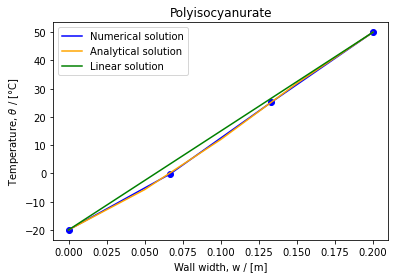

In [7]:
import sys
sys.path.append('../src')  # Add 'scr' directory to the system path
import var_cond

# Data
w = 0.20                    # m, width of the plane wall
nb = 3                      # number of branches, nb > 1
T0, T1 = -20, 50            # °C, boundary temperatures
Tb = None                   # °C, mean (base) temperature
deg = 2

a, b, c = 8.364e-06, -3.857e-04, 3.128e-02  # fitted λ(T) = a·T² + b·T + c

# Model λ(T) = a*T + b to λ(T) = λ0 * (1 + β * (T - Tb))
λ0, β, Tb = var_cond.poly2model([a, b, c], Tb, deg)

cond_model = [λ0, β, Tb, deg]
width_mesh = [w, nb]
surf_temp = [T0, T1]

# Numerical solution
θ_n, q_n, x_n = var_cond.dirichlet_num(cond_model, width_mesh, surf_temp)

# Analytical solution
θ_a, q_a, x_a = var_cond.dirichlet_anal(cond_model, w, surf_temp, num=5)

var_cond.dirichlet_plot(x_n, θ_n, x_a, θ_a, T0, T1, 'Polyisocyanurate')

In [11]:
# Flow rate using average conductivity
θm = (T0**2 + T0 * T1 + T1**2) / 3 - Tb * (T0 + T1 - Tb)
λm = λ0 * (1 + β * θm)
q_m = λm / w * (T0 - T1)

print('Flow rate / m²:')
print(f'q_n = {q_n[0]:.2f} W/m² - numerical solution')
print(f'q_a = {q_a:.2f} W/m² - analytical solution')
print(f'q_m = {q_m:.2f} W/m² - solution using mean conductivity')

Flow rate / m²:
q_n = -10.78 W/m² - numerical solution
q_a = -10.78 W/m² - analytical solution
q_m = -10.78 W/m² - solution using mean conductivity
